<a href="https://colab.research.google.com/github/RooKeeh/AI-Google-Colab/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importarea pachetelor de lucru

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

#Importarea datelor

In [ ]:
x=np.array([5,15,25,35,45,55]).reshape((-1,1))
y=np.array([5,20,14,32,22,38])

#Crearea modelului de regresie

In [ ]:
model=LinearRegression()
model.fit(x,y)
model=LinearRegression().fit(x,y)

#Verificarea rezultatelor

In [ ]:
r=model.score(x,y)
print('coeficientul de determinare R2:',r)

coeficientul de determinare R2: 0.7158756137479542


In [ ]:
print('b0:',model.intercept_)
print('b1:',model.coef_)

b0: 5.633333333333329
b1: [0.54]


#Rezultatul estimat

In [ ]:
y_pred=model.predict(x)
print('rezultatul estimat:',y_pred,sep='\n')

rezultatul estimat:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


#Bibliotecile numpy si matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Definirea functiilor utile

In [ ]:
def plot_observed_vs_predicted(x,y,y_hat,theta_hat):
  fig,ax=plt.subplots()
  ax.scatter(x,y,label='Observed')
  ax.plot(x,y_hat,color='r',label='Fit')
  ymin=np.minimum(y,y_hat)
  ymax=np.maximum(y,y_hat)
  ax.vlines(x,ymin,ymax,'g',alpha=0.5,label='Residuals')
  ax.set(title=fr"$\hat{{\theta}}$={theta_hat:0.2f},MSE={mse(x,y,theta_hat):.2f}",xlabel='x',ylabel='y')
  ax.legend()
def generate_data(slope=1.0,intercept=0.0,n_samples=20):
  x=9*np.random.rand(n_samples)
  y_perfect=slope*x+intercept
  noise=np.random.rand(n_samples)
  y=y_perfect+noise
  return x,y_perfect,y
def plot_observed(x,y):
  fig,ax=plt.subplots()
  ax.scatter(x,y)
  ax.set(xlabel='Număr de ore dormite înainte de examen',ylabel='Nota obținută la examen',xlim=(0,9.1),ylim=(0,10.3))
  ax.set_xticks(np.arange(0, 11, 2))
  ax.set_yticks(np.arange(0, 11, 1))

#Exemplu practic

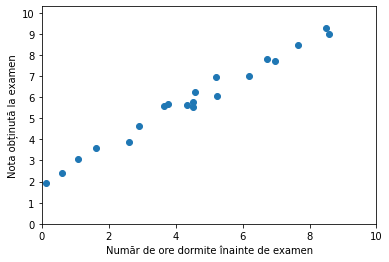

In [ ]:
x,y_perfect,y=generate_data(slope=0.8,intercept=1.8,n_samples=20)
plot_observed(x,y)

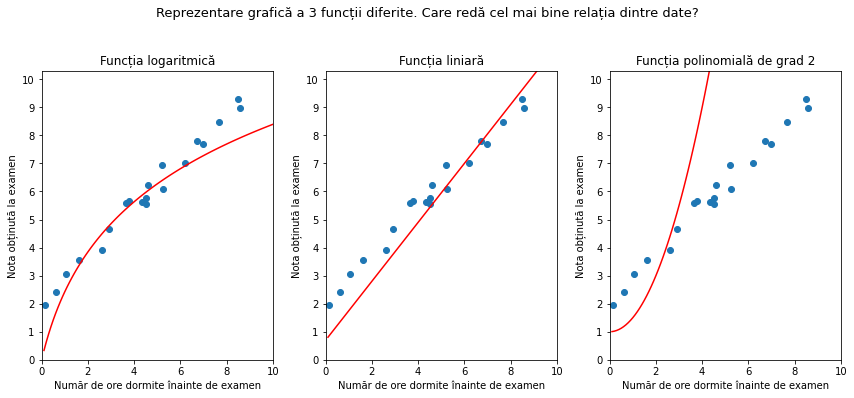

In [ ]:
def logarithmic(xs,scale=1.0,rate=1.0,x0=0.0):
  ys=scale*np.log(rate*(xs-x0))
  return ys
def linear(xs,slope=3.0,intercept=-4.3):
  ys=slope*xs+intercept
  return ys
def quadratic(xs,slope=0.5,intercept=-0.5):
  ys=slope*(xs**2)+intercept
  return ys
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
fig.suptitle('Reprezentare grafică a 3 funcții diferite. Care redă cel mai bine relația dintre date?',size=13,y=1.1)
x_=np.linspace(0.1,10,100)
log_y=logarithmic(x_,scale=3.5,rate=1.0,x0=-1)
ax1.scatter(x,y,label='data points')
ax1.plot(x_,log_y,color='red')
ax1.set(title='Funcția logaritmică',label='f(x)=clog(ax+b)',xlabel='Număr de ore dormite înainte de examen',ylabel='Nota obținută la examen',xlim=(0,9.1),ylim=(0,10.3))
ax1.set_xticks(np.arange(0,11,2))
ax1.set_yticks(np.arange(0,11,1))
linear_y=linear(x_,slope=1.05,intercept=0.7)
ax2.scatter(x,y,label='data points')
ax2.plot(x_,linear_y,color='red')
ax2.set(title='Funcția liniară',label='f(x)=ax+b',xlabel='Număr de ore dormite înainte de examen',ylabel='Nota obținută la examen',xlim=(0,9.1),ylim=(0,10.3))
ax2.set_xticks(np.arange(0,11,2))
ax2.set_yticks(np.arange(0,11,1))
quadratic_y=quadratic(x_,slope=0.5,intercept=1.0)
ax3.scatter(x,y,label='Data points')
ax3.plot(x_,quadratic_y,color='red')
ax3.set(title='Funcția polinomială de grad 2',label='f(x)=ax^2+b',xlabel='Număr de ore dormite înainte de examen',ylabel='Nota obținută la examen',xlim=(0,9.1),ylim=(0,10.3))
ax3.set_xticks(np.arange(0,11,2))
ax3.set_yticks(np.arange(0,11,1))
plt.tight_layout(pad=1.2)
plt.show()

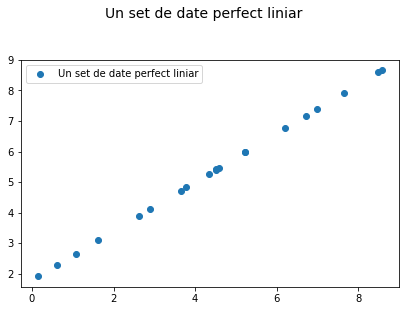

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Un set de date perfect liniar',size=14,y=1.1)
ax.scatter(x,y_perfect,label='Un set de date perfect liniar')
plt.legend()
plt.tight_layout(pad=2.0)
plt.show()

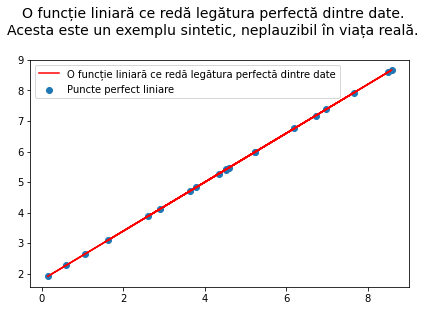

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('O funcție liniară ce redă legătura perfectă dintre date.\n''Acesta este un exemplu sintetic, neplauzibil în viața reală.',size=14,y=1.1)
linear_y=linear(x,slope=0.8,intercept=1.8)
ax.scatter(x,y_perfect,label='Puncte perfect liniare')
ax.plot(x,linear_y,color='red',label='O funcție liniară ce redă legătura perfectă dintre date')
plt.legend()
plt.tight_layout(pad=2.0)
plt.show()

#Determinarea functiei de regresie liniara

In [ ]:
import ipywidgets as widgets
xs=np.linspace(0,10,100)
def refresh(slope=3.0,intercept=-5.0):
  plt.scatter(x,y,label='Puncte asociate datelor observate')
  plt.xlim(0,9)
  plt.ylim(0,11)
  ys=linear(xs,slope=slope,intercept=intercept)
  plt.plot(xs,ys,lw=3,color='red', 
           label=f'f(x)={slope}*x+{intercept}')
  plt.title('Aproximarea datelor reale printr-o funcție liniară',size=13)
  plt.legend()
  plt.tight_layout(pad=2.0)
  plt.show()
_=widgets.interact(refresh,slope=(-2,5,0.5),intercept=(-5,5,0.25))

interactive(children=(FloatSlider(value=3.0, description='slope', max=5.0, min=-2.0, step=0.5), FloatSlider(va…

#Eroarea medie

In [ ]:
def mse(x,y,slope,intercept=0.0):
  y_hat=slope*x+intercept
  mse=np.mean((y-y_hat)**2)
  return mse
a_values=[0.5,1.0,1.5]
b_values=[1.0,0.0,2.0]
for a,b in zip(a_values,b_values):
  print("a=%.2f,b=%.2f=>MSE(eroare medie)=%.2f"%(a,b,mse(x,y,slope=a,intercept=b)))

a=0.50,b=1.00=>MSE(eroare medie)=7.37
a=1.00,b=0.00=>MSE(eroare medie)=2.04
a=1.50,b=2.00=>MSE(eroare medie)=11.12


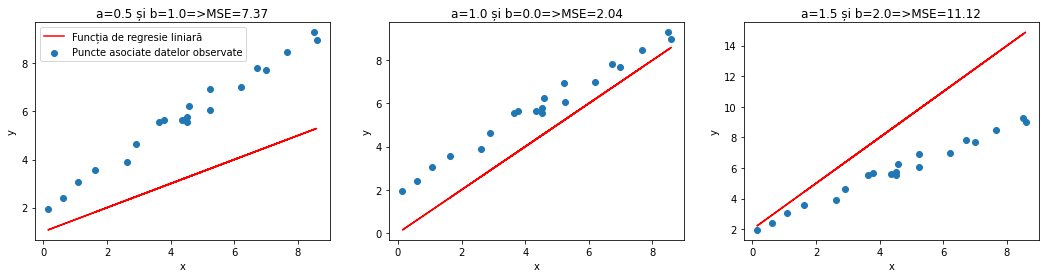

In [ ]:
fig,axes=plt.subplots(ncols=3,figsize=(18,4))
for a,b,ax in zip(a_values,b_values,axes):
  ax.scatter(x,y,label='Puncte asociate datelor observate')
  y_hat=a*x+b
  ax.plot(x,y_hat,color='r',label='Funcția de regresie liniară')
  ax.set(title=fr'a={a} și b={b}=>MSE={mse(x,y,a,b):.2f}',xlabel='x',ylabel='y');
axes[0].legend()
plt.show()

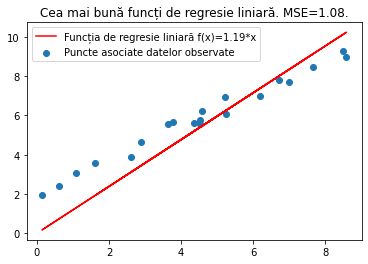

In [ ]:
def linear_regression(x,y):
  numerator=np.sum(x*y)
  denominator= np.sum(x**2)
  slope=numerator/denominator
  return slope
slope=linear_regression(x,y)
plt.scatter(x,y,label='Puncte asociate datelor observate')
plt.title('Cea mai bună funcți de regresie liniară. MSE=%.2f.'%mse(x,y,slope))
plt.plot(x,slope*x,label='Funcția de regresie liniară f(x)=%.2f*x'%slope,color='r')
plt.legend()
plt.show()

#Exercitii:
1. O metoda pentru a obtine rezultate similare este sa realizam estimarea
folosind coeficientii b0 si b1. Scrieti codul aferent.
2. Realizati estimari dand alte valori pentru variabila x.
3. Folositi-va de urmatoarele date de intrare pentru a crea un model de
regresie multipla, respectiv cu doua variabile de intrare. Acestea vor fi
salvate intr-un array x cu doua coloane.
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [16]:
b0=np.array([7,8,9,10,11,12]).reshape((-1,1))
b1=np.array([7,22,16,34,24,40])
model=LinearRegression()
model.fit(b0,b1)
model=LinearRegression().fit(b0,b1)
y_pred=model.predict(x)
print('rezultatul estimat:',y_pred,sep='\n')

rezultatul estimat:
[-22.06666667 -16.66666667 -11.26666667  -5.86666667  -0.46666667
   4.93333333]


In [12]:
x=np.array([1,2,3,4,5,6]).reshape((-1,1))
y=np.array([6,21,15,33,23,39])
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
print('rezultatul estimat:', y_pred, sep='\n')

rezultatul estimat:
[ 9.33333333 14.73333333 20.13333333 25.53333333 30.93333333 36.33333333]


In [27]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r = model.score(x, y)
print('coeficientul de determinare R2:', r)
print('b0:', model.intercept_)
print('b1:', model.coef_)
y_pred = model.predict(x)
print('rezultatul estimat:', y_pred, sep='\n')

coeficientul de determinare R2: 0.8615939258756775
b0: 5.52257927519819
b1: [0.44706965 0.25502548]
rezultatul estimat:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
